In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('balance-scale.txt',sep = ',',header = None)

In [3]:
df.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
X = df[[1,2,3,4]].values

In [5]:
Y = df[0]

In [6]:
X

array([[1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 3],
       ...,
       [5, 5, 5, 3],
       [5, 5, 5, 4],
       [5, 5, 5, 5]])

In [7]:
Y

0      B
1      R
2      R
3      R
4      R
5      R
6      R
7      R
8      R
9      R
10     R
11     R
12     R
13     R
14     R
15     R
16     R
17     R
18     R
19     R
20     R
21     R
22     R
23     R
24     R
25     L
26     B
27     R
28     R
29     R
      ..
595    L
596    L
597    L
598    B
599    R
600    L
601    L
602    L
603    L
604    L
605    L
606    L
607    L
608    L
609    L
610    L
611    L
612    L
613    L
614    L
615    L
616    L
617    L
618    L
619    L
620    L
621    L
622    L
623    L
624    B
Name: 0, Length: 625, dtype: object

In [8]:
from sklearn.model_selection import train_test_split as split

In [9]:
train_x,test_x,train_y,test_y = split(X,Y,test_size = 0.2)

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Entropy

In [11]:
tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)

In [12]:
tree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
pred = tree.predict(test_x)

In [14]:
pd.DataFrame({'A':test_y,'P':pred})

,A,P
282,B,L
368,R,L
365,L,L
175,L,L
3,R,R
364,B,L
131,R,B
537,L,R
6,R,B
268,R,R


In [15]:
from sklearn import metrics

In [16]:
print(metrics.accuracy_score(test_y,pred))

0.672


In [17]:
from sklearn.externals.six import StringIO

In [18]:
from sklearn.tree import export_graphviz

In [19]:
from IPython.display import Image
import pydotplus

In [20]:
dot_data = StringIO()

In [21]:
export_graphviz(tree,out_file = dot_data,filled = True,rounded = True,special_characters = True)

In [22]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

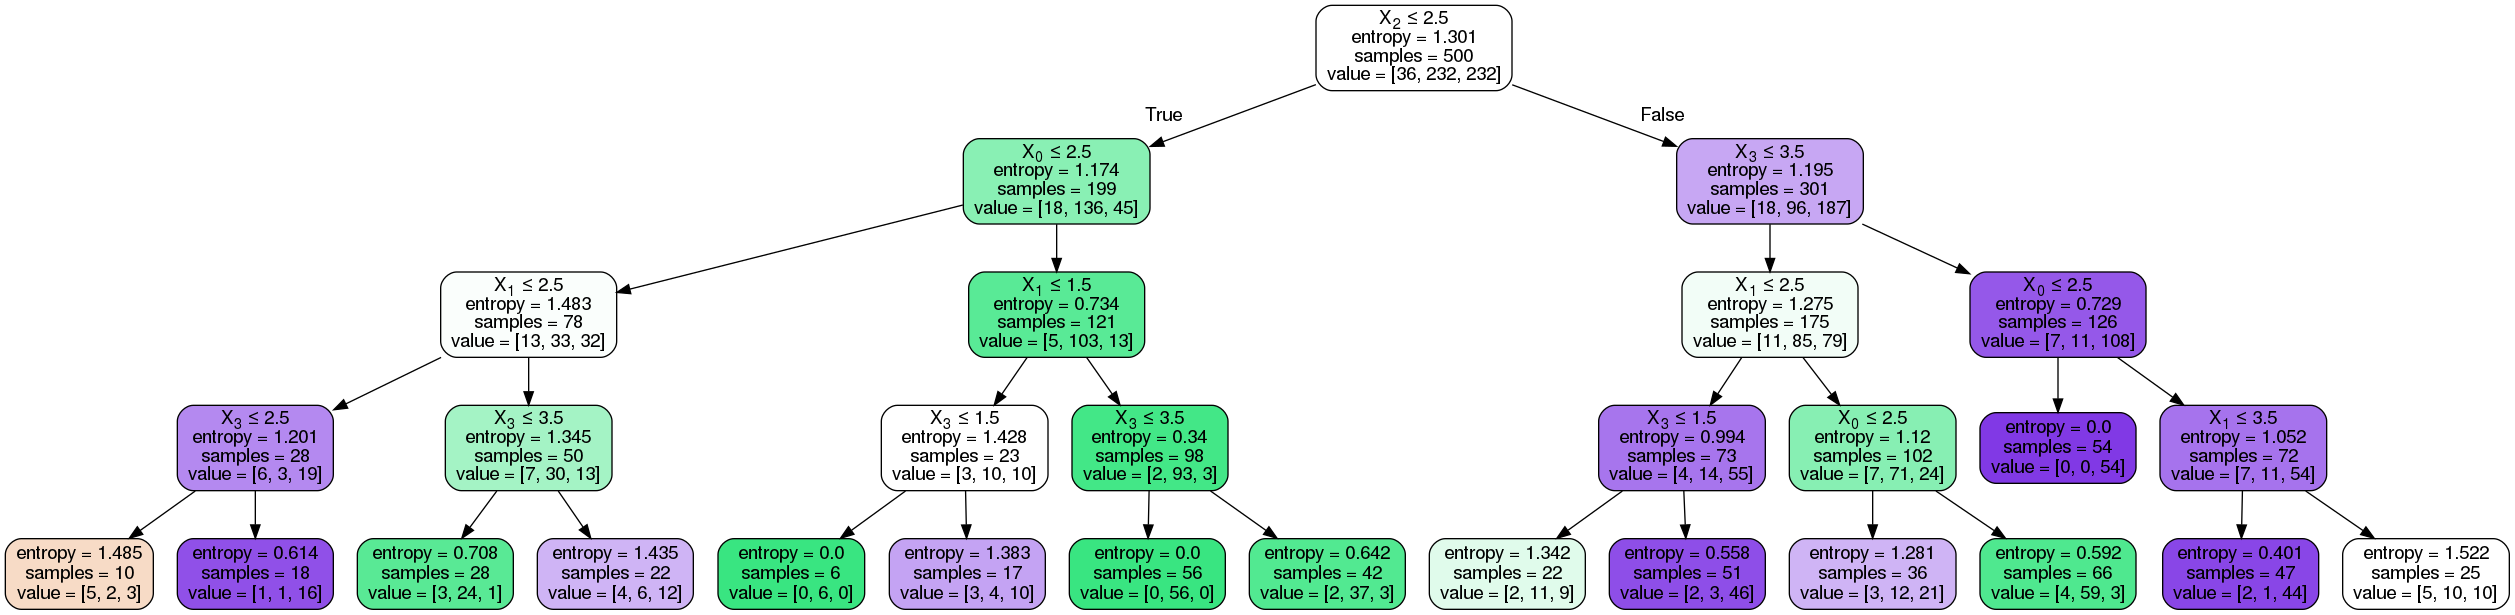

In [23]:
Image(graph.create_png())

# Gini

In [24]:
tree = DecisionTreeClassifier(criterion = 'gini',max_depth = 4)

In [25]:
tree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
pred2 = tree.predict(test_x)

In [27]:
print(pd.DataFrame({'Actual: ':test_y,'Predcited: ':pred2}))

    Actual:  Predcited: 
282        B           L
368        R           L
365        L           L
175        L           R
3          R           R
364        B           L
131        R           R
537        L           R
6          R           R
268        R           R
179        L           R
415        L           L
488        L           L
496        L           L
478        L           L
246        B           R
142        R           R
24         R           R
82         R           L
251        L           R
337        L           L
150        L           R
594        B           L
257        R           R
135        R           L
292        R           R
192        R           R
416        B           R
459        L           L
181        L           R
..       ...         ...
616        L           L
127        R           R
15         R           R
575        L           L
107        R           L
69         R           R
376        L           R
561        L           L


In [28]:
print(metrics.accuracy_score(test_y,pred2))

0.672


In [29]:
dot_data = StringIO()

In [30]:
export_graphviz(tree,out_file = dot_data,filled = True,rounded = True,special_characters = True)

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

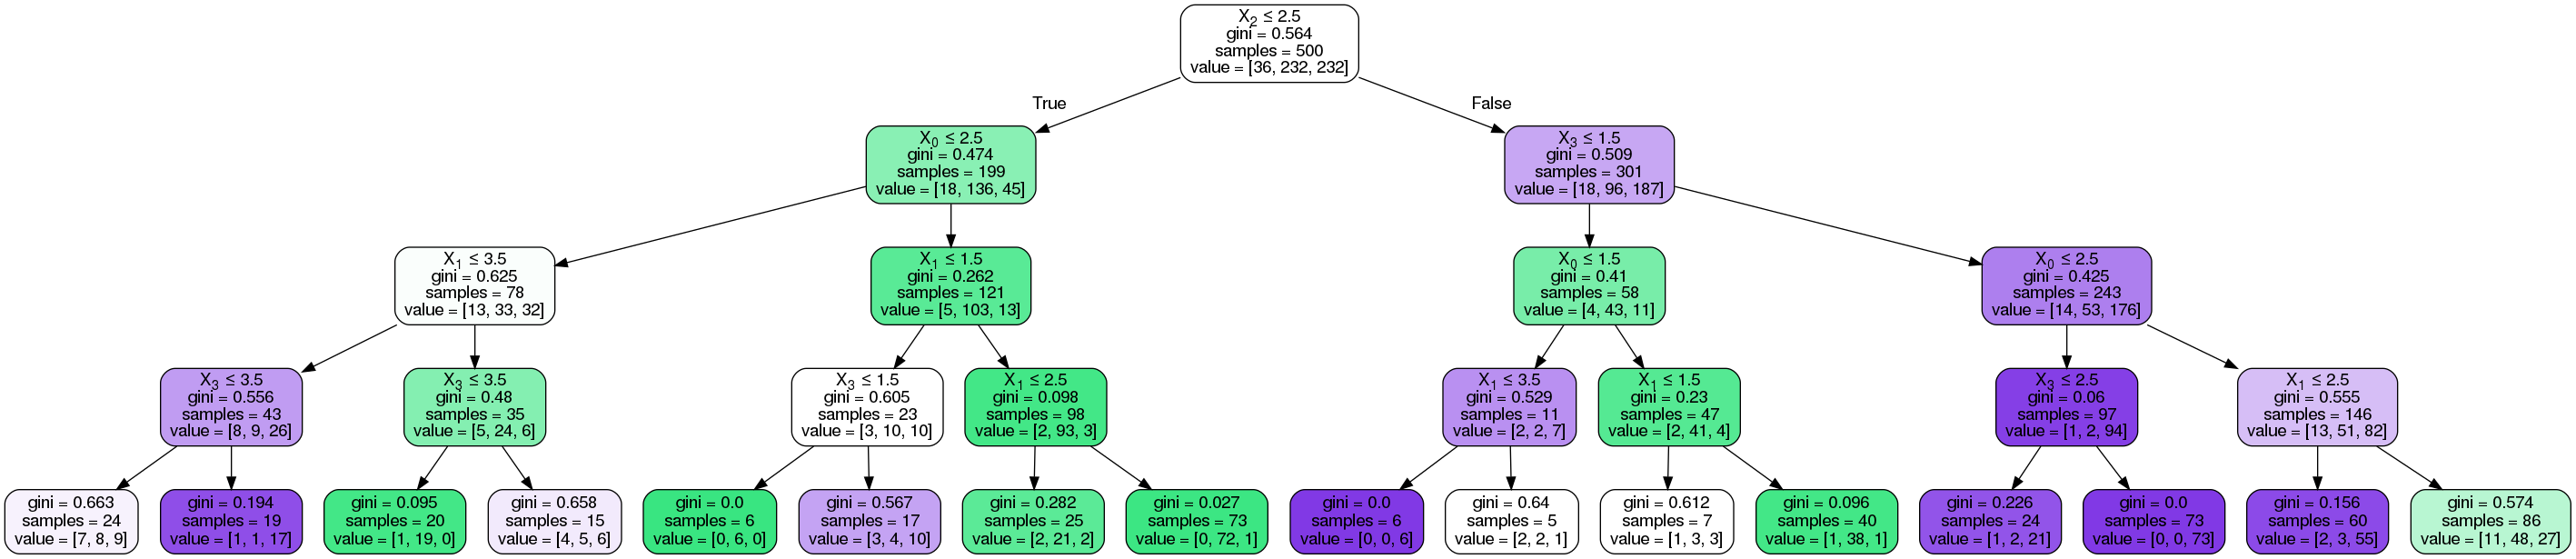

In [32]:
Image(graph.create_png())